In [7]:
#데이터 로딩
import os
import pandas as pd

os.chdir("c:/pytest")

dataset = pd.read_csv('knn.csv')
print(dataset.head())
print(dataset.shape)
X=dataset.iloc[:,0:2]
Y=dataset.iloc[:,2]

      x1     x2    y
0   9.96  4.600  1.0
1  11.00 -0.168  0.0
2  11.50  5.210  1.0
3   8.69  1.540  0.0
4   8.11  4.290  0.0
(26, 3)


In [29]:
print(X)

[[ 9.96 ]
 [ 4.6  ]
 [11.   ]
 [-0.168]
 [11.5  ]
 [ 5.21 ]
 [ 8.69 ]
 [ 1.54 ]
 [ 8.11 ]
 [ 4.29 ]
 [ 8.31 ]
 [ 4.81 ]
 [11.9  ]
 [ 4.65 ]
 [ 9.67 ]
 [-0.203]
 [ 8.35 ]
 [ 5.13 ]
 [ 8.67 ]
 [ 4.48 ]
 [ 9.18 ]
 [ 5.09 ]
 [10.2  ]
 [ 2.46 ]
 [ 8.69 ]
 [ 1.49 ]
 [ 8.92 ]
 [-0.64 ]
 [ 9.49 ]
 [ 4.33 ]
 [ 9.26 ]
 [ 5.13 ]
 [ 8.   ]
 [ 4.85 ]
 [ 8.18 ]
 [ 1.3  ]
 [ 8.73 ]
 [ 2.49 ]
 [ 9.32 ]
 [ 5.1  ]
 [10.1  ]
 [ 0.991]
 [ 9.5  ]
 [-0.264]
 [ 8.34 ]
 [ 1.64 ]
 [ 9.5  ]
 [ 1.94 ]
 [ 9.15 ]
 [ 5.5  ]
 [11.6  ]
 [ 1.34 ]]


In [30]:
print(Y)

0     1.0
1     0.0
2     1.0
3     0.0
4     0.0
5     1.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    0.0
13    0.0
14    1.0
15    1.0
16    1.0
17    0.0
18    0.0
19    1.0
20    0.0
21    0.0
22    0.0
23    0.0
24    1.0
25    0.0
Name: y, dtype: float64


In [9]:
#데이터 확인
print(X.head())
print(Y.head())
print(X.shape)
print(Y.shape)

      x1     x2
0   9.96  4.600
1  11.00 -0.168
2  11.50  5.210
3   8.69  1.540
4   8.11  4.290
0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: y, dtype: float64
(26, 2)
(26,)


In [10]:
#데이터 분리
#훈련 데이터와 테스트 데이터로 분리하고 확인한다
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(X_train.head())
print(X_test.head())

       x1     x2
13   8.92 -0.640
18   8.73  2.490
19   9.32  5.100
16   8.00  4.850
1   11.00 -0.168
       x1     x2
2   11.50  5.210
20  10.10  0.991
14   9.49  4.330
17   8.18  1.300
5    8.31  4.810


In [12]:
#모델 만들기
#knn 분류기 객체를 생성하고 훈련데이터로 모델을 학습시킨다.
#분류기 객체 만들기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#훈련데이터를 모델에 넣어 학습시키기
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
#데이터 예측
#테스트 데이터를 넣어 예측하고 정확도를 산출

result = clf.predict(X_test)
print(result)

print(clf.score(X_test,Y_test))
print(round(clf.score(X_test,Y_test),3))

[1. 0. 1. 0. 1. 0. 0.]
0.8571428571428571
0.857


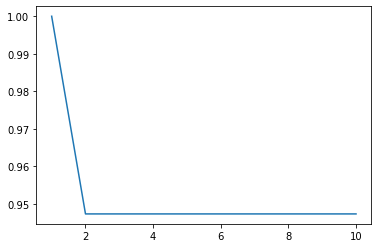

In [39]:
# K 숫자를 변경해보기
import matplotlib.pyplot as plt
train_accuracy = []
test_accuracy = []
n_neighbors_settings = range(1, 11)

for n_neighbors in n_neighbors_settings :
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    train_accuracy.append(clf.score(X_train, Y_train))
    test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(n_neighbors_settings, train_accuracy, label="Traing Acuuracy")

plt.show()

In [50]:
# KNN 회귀
import os
import pandas as pd

os.chdir("c:/pytest")

dataset = pd.read_csv('wave.csv')
print(dataset.head())
print(dataset.shape)
X=dataset.iloc[:,0]
Y=dataset.iloc[:,1]

       x      y
0 -0.753 -0.448
1  2.700  0.331
2  1.390  0.779
3  0.592  0.035
4 -2.060 -1.390
(40, 2)


In [51]:
#데이터 확인
print(X.head())
print(Y.head())
print(X.shape)
print(Y.shape)

X = X.values.reshape(-1,1)
print(X.shape)

0   -0.753
1    2.700
2    1.390
3    0.592
4   -2.060
Name: x, dtype: float64
0   -0.448
1    0.331
2    0.779
3    0.035
4   -1.390
Name: y, dtype: float64
(40,)
(40,)
(40, 1)


In [52]:
# 모델 훈련
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# K = 3로 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [53]:
#테스트 데이터 검증
print("prediction:", reg.predict(X_test))
reg.score(X_test, Y_test)

print(reg.score(X_test, Y_test))
print(round(reg.score(X_test, Y_test),3))

prediction: [-0.054       0.35676667  1.13766667 -1.89333333 -1.14133333 -1.63
  0.35676667  0.91333333 -0.44666667 -1.14133333]
0.8350744129227526
0.835
